In [1]:
import pandas as pd
HousePrice_df = pd.read_csv(r"D:\sam_py_course\July24\archive (1)\House_Price.csv")

In [2]:
HousePrice_df.shape

(506, 19)

In [3]:
HousePrice_df.head()


,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


### Target Variable

In [4]:
HousePrice_df['price'].nunique()

228

### Drop Duplicated

In [5]:
HousePrice_df.duplicated().sum()

0

### Missing Values

In [6]:
HousePrice_df.isna().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

In [7]:
HousePrice_df['n_hos_beds'] = HousePrice_df['n_hos_beds'].fillna(0)

### Outliers

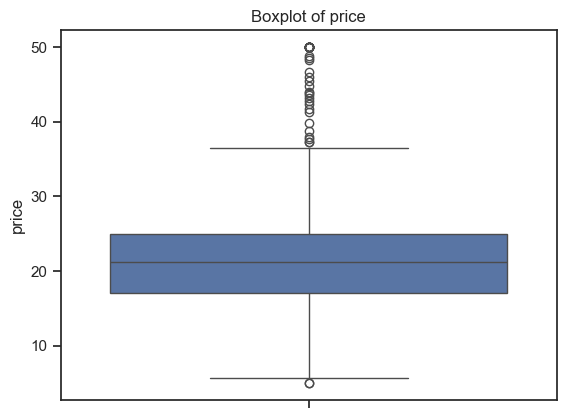

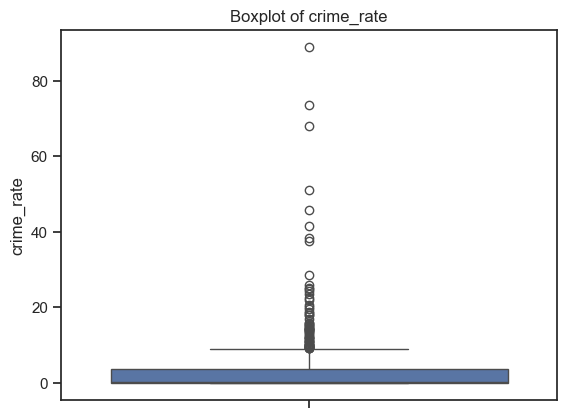

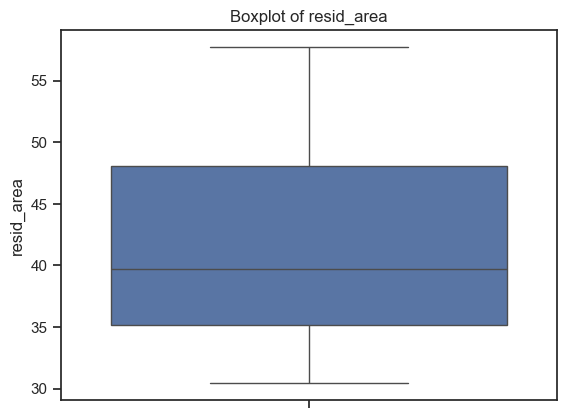

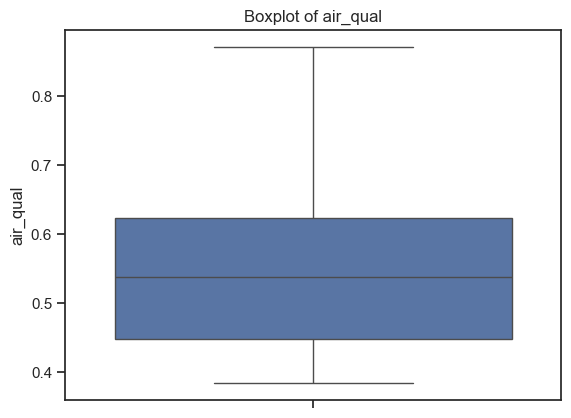

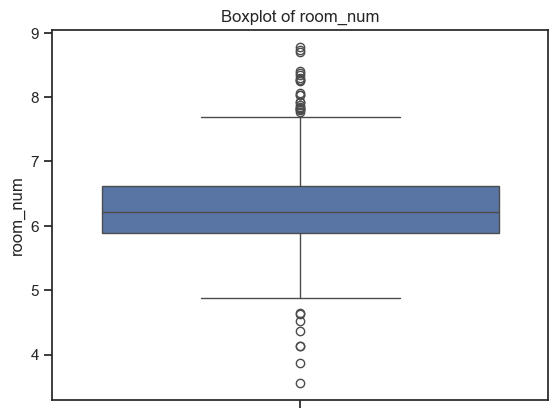

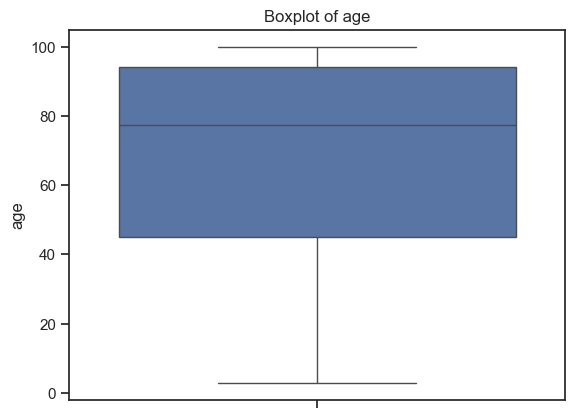

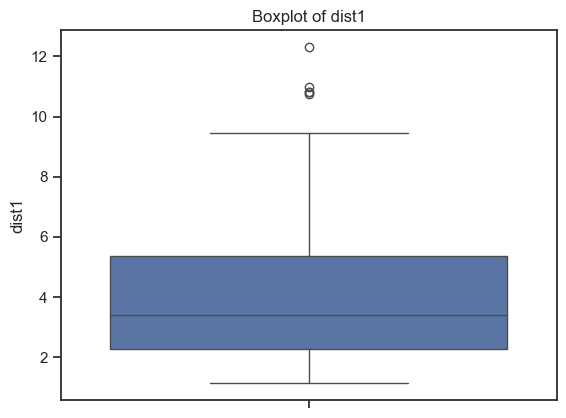

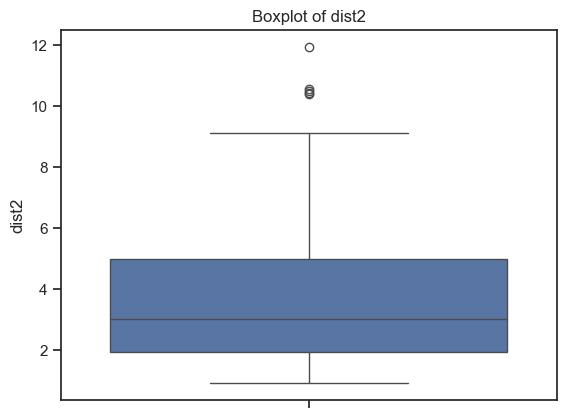

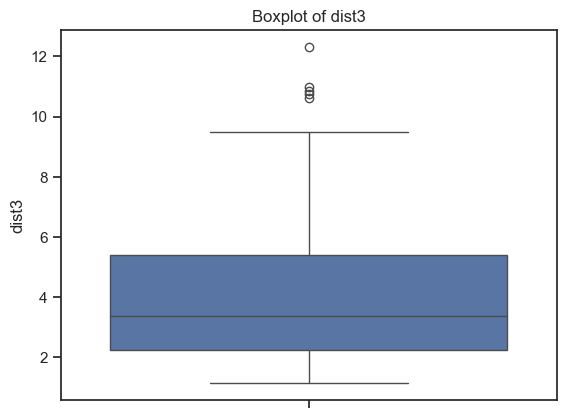

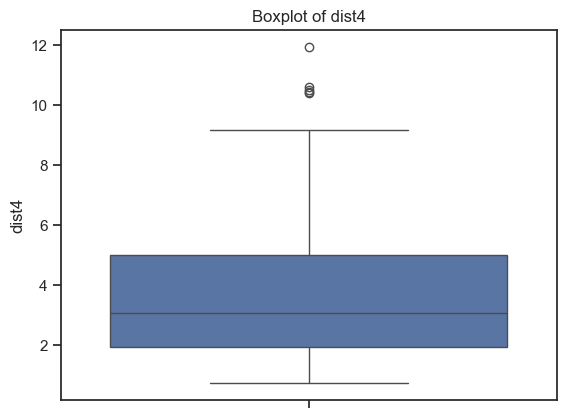

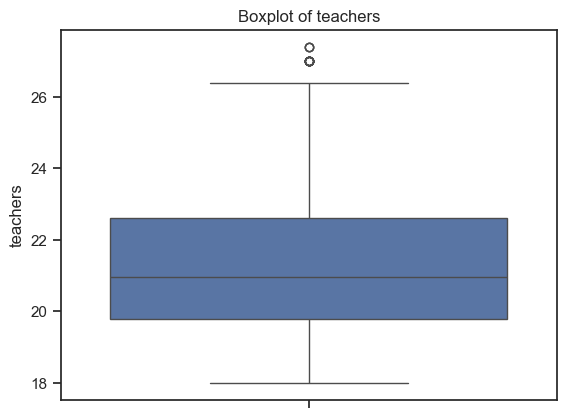

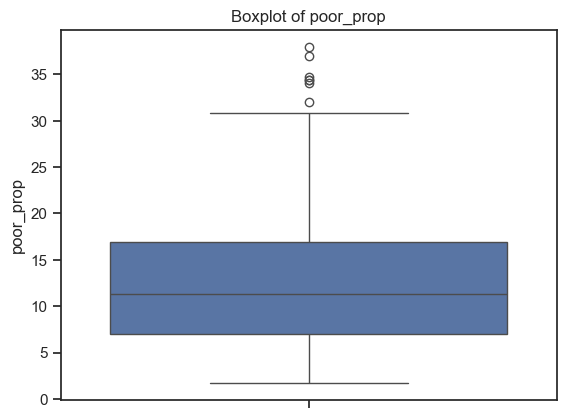

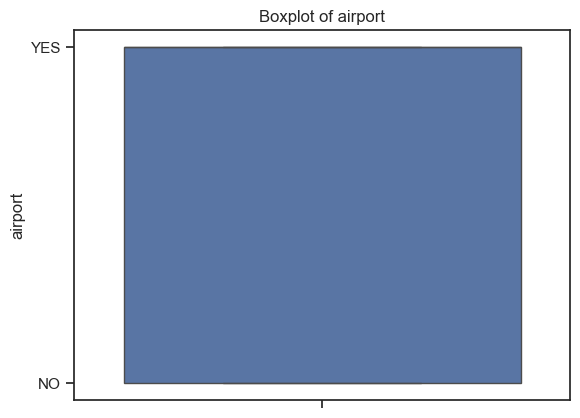

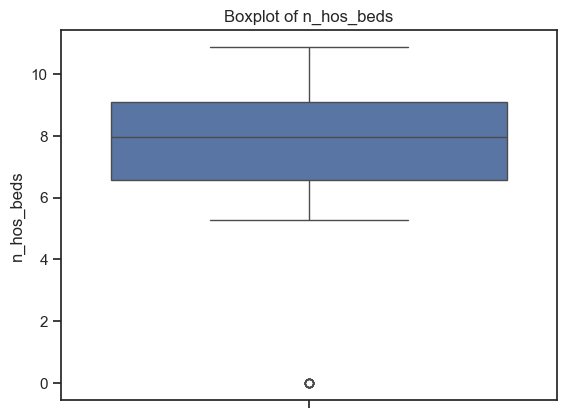

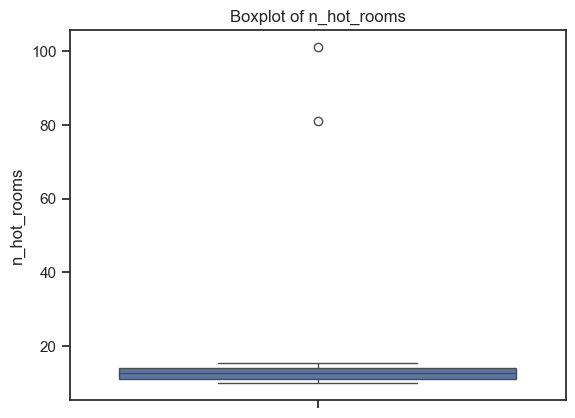

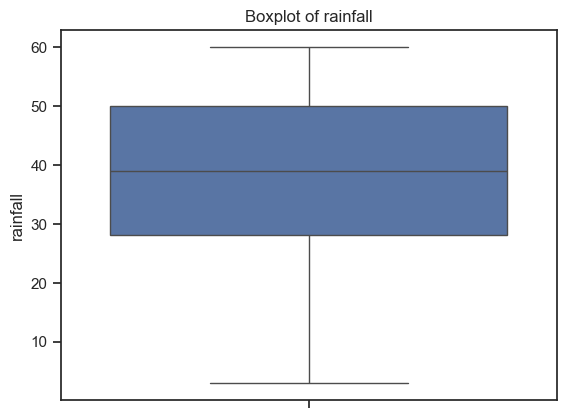

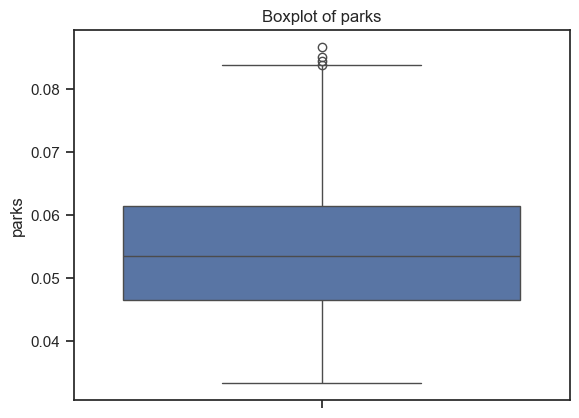

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['price','crime_rate','resid_area','air_qual','room_num','age','dist1','dist2','dist3','dist4','teachers','poor_prop','airport','n_hos_beds','n_hot_rooms','rainfall','parks']
sns.set(style="ticks")

for col in numeric_cols:
    sns.boxplot(y=HousePrice_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [10]:
HousePrice_df['n_hot_rooms'].sort_values(ascending = False)

2      101.1200
423     81.1200
166     15.4000
267     15.4000
369     15.4000
         ...   
388     10.0816
436     10.0768
490     10.0648
416     10.0600
401     10.0576
Name: n_hot_rooms, Length: 506, dtype: float64

In [11]:
HousePricenew_df= HousePrice_df.drop([2, 423], axis=0).reset_index(drop= True)

In [79]:
HousePricenew_df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
3,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474
4,28.7,0.02985,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,YES,7.174,14.2296,None,53,YES,0.045910


In [80]:
HousePricenew_df['n_hot_rooms'].sort_values(ascending = False)

165    15.4000
368    15.4000
266    15.4000
203    15.4000
261    15.3904
        ...   
387    10.0816
434    10.0768
488    10.0648
415    10.0600
400    10.0576
Name: n_hot_rooms, Length: 504, dtype: float64

## Model Building

In [12]:
HousePricenew_df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
3,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474
4,28.7,0.02985,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,YES,7.174,14.2296,None,53,YES,0.045910


In [13]:
data = HousePricenew_df.copy()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [15]:
le = LabelEncoder()
data['waterbody']=le.fit_transform(data['waterbody'])

In [16]:
data['airport']=le.fit_transform(data['airport'])

In [17]:
data['bus_ter'] = le.fit_transform(data['bus_ter'])

In [18]:
X = data.drop('price', axis=1)
y = data['price']

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
data.columns

Index(['price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
       'dist1', 'dist2', 'dist3', 'dist4', 'teachers', 'poor_prop', 'airport',
       'n_hos_beds', 'n_hot_rooms', 'waterbody', 'rainfall', 'bus_ter',
       'parks'],
      dtype='object')

In [22]:
scaling_columns= ['crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
       'dist1', 'dist2', 'dist3', 'dist4', 'teachers', 'poor_prop', 
       'n_hos_beds', 'n_hot_rooms','rainfall',
       'parks']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

#### Performance metrics for Regression 
MSE, RMSE, MAPE, MAE, R2

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [27]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 22.778465351884783
R-squared: 0.5901717229795351
